## Time Series Analysis- Airbnb

**Could a meteorologist predict the prices of airbnbs?**

Eduardo Saverin co-founder of facebook famously made 200k dollars betting on oil futures during one summer break in college. His trick was that he was naturally interested in meteorology and "if you can predict the weather you can predict the price of heating oil". Could the same be said for the price of airbnbs. 

**Dataset- Seattle Airbnb Open Data, https://www.kaggle.com/datasets/airbnb/seattle**

The dataset consists of 3 '.csv' files- calendar.csv, reviews.csv, listings.csv. 

***Aim- To understand if there is a seasonal change in the price of listings and if there is change to understand when prices are higher or lower***

### Understanding the Data

In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import libraries

In [27]:
calendar_path = "calendar.csv"
reviews_path= "reviews.csv"
listings_path= "listings.csv"
if os.path.isfile(calendar_path):
    calendar= pd.read_csv(calendar_path)
if os.path.isfile(reviews_path):
    review= pd.read_csv(reviews_path)
if os.path.isfile(listings_path):
    listings= pd.read_csv(listings_path)

In [28]:
print(calendar.head())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [4]:
print(listings.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [5]:
print(review.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  


**Calendar**- Contains information about various listings in seattle and price of the listings on any given day. Its columns are- listing_id, date, availability and price

**Listings**- Contains information of each listing, along with information on when and how the data was scrapped to obtain the information on each listing

**Reviews**- Contains informtation on reviews given to each listing. 

We will focus on "calendar" as it contains all the neccessary information to analyse the fluctuations of price with time. 

### Understanding Calendar.csv

In [6]:
print(calendar.head())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [7]:
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [8]:
print(calendar.isnull().sum())

listing_id         0
date               0
available          0
price         459028
dtype: int64


In [9]:
calendar.groupby('available')['price'].count()

available
f         0
t    934542
Name: price, dtype: int64

**Understandings**

There are no null values in any other column except for price. We also see that when availability is 'f' i.e. the listing is unaivable on a particular day we do not have information about the price on that day. 

Price is of object data type due to it's formatting and needs to be changed to float for further analysis. 

Date is not of datetime data type, this will complicate future analyis

### Data Preperation

In [30]:
calendar= calendar.dropna()

In [31]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) #change price to float data type

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\nayav\AppData\Local\Temp\ipykernel_6768\473575586.py:1: SyntaxWarning: invalid escape sequence '\$'
  calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) #change price to float data type


In [32]:
calendar['date'] = pd.to_datetime(calendar['date']) #change date to datetime data type

In [33]:
print(calendar.head())

    listing_id       date available  price
0       241032 2016-01-04         t   85.0
1       241032 2016-01-05         t   85.0
9       241032 2016-01-13         t   85.0
10      241032 2016-01-14         t   85.0
14      241032 2016-01-18         t   85.0


In [34]:
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB
None


### Weekly Trends of Data

Airbnb being a hospitality service provider would see costs go up when the demand for travelling is higher. Our hypothesis- the cost of Airbnb rentals would go up during the weekends as people have time off from work and would prefer to travel on the weekends more than weekdays. To test the hypothesis we plot a graph of weekly average prices between Monday to Thursday and between Friday to Saturday. 

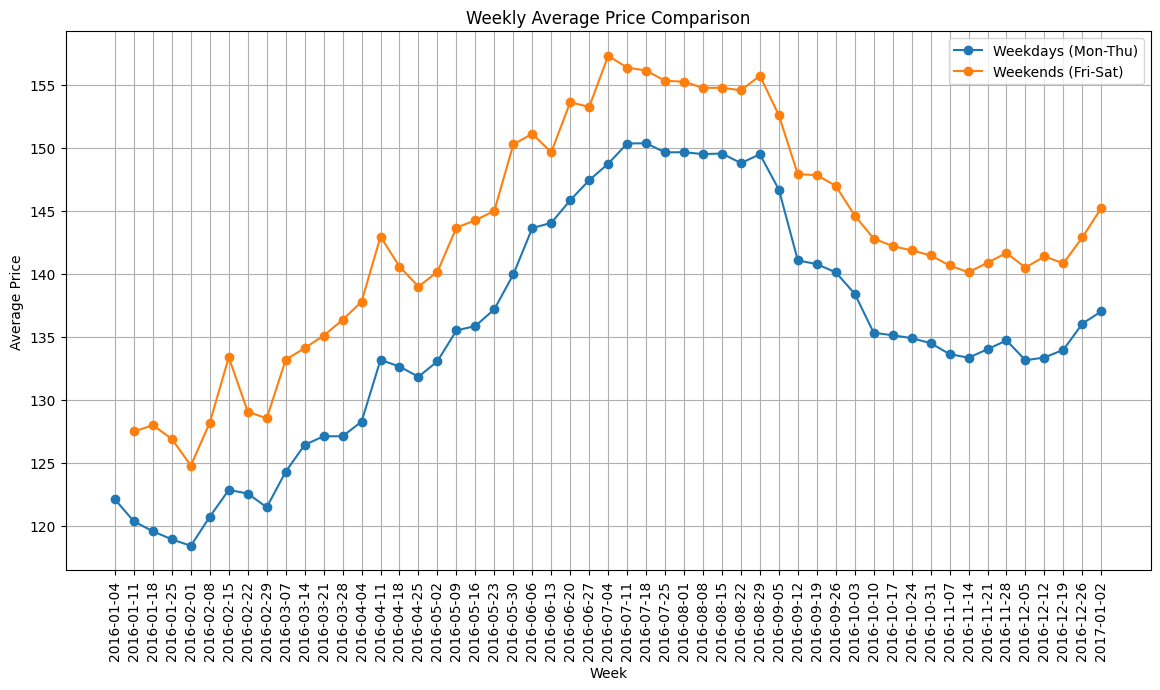

In [22]:
calendar['day_of_week'] = calendar['date'].dt.day_name()

weekdays = calendar[calendar['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]
weekends = calendar[calendar['day_of_week'].isin(['Friday', 'Saturday'])]

weekdays.set_index('date', inplace=True)
weekends.set_index('date', inplace=True)

weekdays_avg = weekdays['price'].resample('W-MON').mean()
weekends_avg = weekends['price'].resample('W-MON').mean()

plt.figure(figsize=(14, 7))
plt.plot(weekdays_avg, label='Weekdays (Mon-Thu)', marker='o')
plt.plot(weekends_avg, label='Weekends (Fri-Sat)', marker='o')
plt.title('Weekly Average Price Comparison')
plt.xticks(weekdays_avg.index, [date.strftime('%Y-%m-%d') for date in weekdays_avg.index], rotation=90)
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

We see that throughout the year weekend prices are consistently above weekday prices hence confirming our hypothesis.

As the work week resumes on Monday, many travellers prefer to be at home Sunday night leading to lesser demand than on Friday and Saturday. This hypothesis is confirmed by the following graph

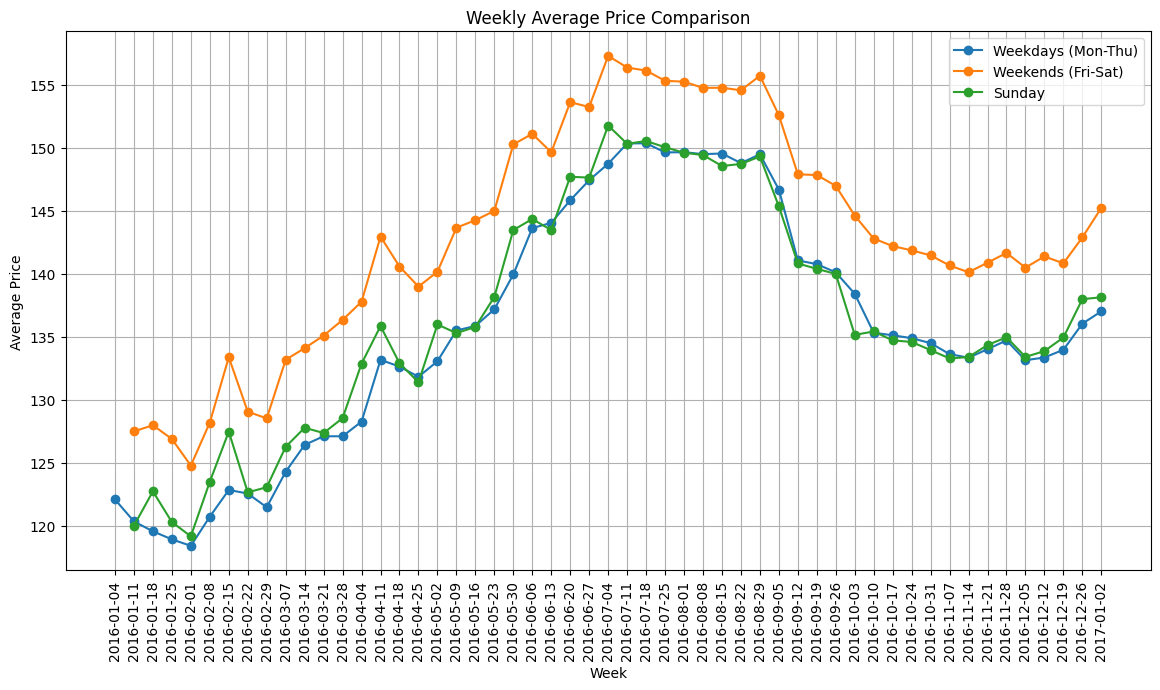

In [20]:
su= calendar[calendar['day_of_week'].isin(['Sunday'])]
su.set_index('date', inplace=True)
s_avg= su['price'].resample('W-MON').mean()

plt.figure(figsize=(14, 7))
plt.plot(weekdays_avg, label='Weekdays (Mon-Thu)', marker='o')
plt.plot(weekends_avg, label='Weekends (Fri-Sat)', marker='o')
plt.plot(s_avg, label='Sunday', marker='o')
plt.title('Weekly Average Price Comparison')
plt.xticks(weekdays_avg.index, [date.strftime('%Y-%m-%d') for date in weekdays_avg.index], rotation=90)
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


Notable days where the price on sundays is higher than the price on weekdays- 18/01, 15/02, 30/05, 04/07, 25/12(dd/MM format)

![holidays oberved in USA](./holidays_2016.png)

The signifcant difference in means between weekdays and sundays can be explained by there being a national holiday on the subequent monday thus encoraging travel and also allowing travellers to return back home a day later. The above picture lists all the public holidays observed in USA. The dates in the list and the peaks observed match exactly. 

***Conclusion***

We can understand that the average price of listings on weekdays is signficantly cheaper than weekends.

The average price on 'Sundays' closely follows that of weekdays with the exception of when there is public holiday on monday. 

### Seasonal Trends Of Data

The data spanning a full calendar year gives the unique opportunity to explore trends in travelling with respect to the seasons. Our hypothesis- Prices of Airbnb rentals in Seattle will tend upward during the summer and spring months as winter months are too cold to attract tourists to the area. Another reason could be that children have their summer breaks thus families travel more during these months. To test our hypothesis we plot the monthly average of prices and see the differences across seasons. 

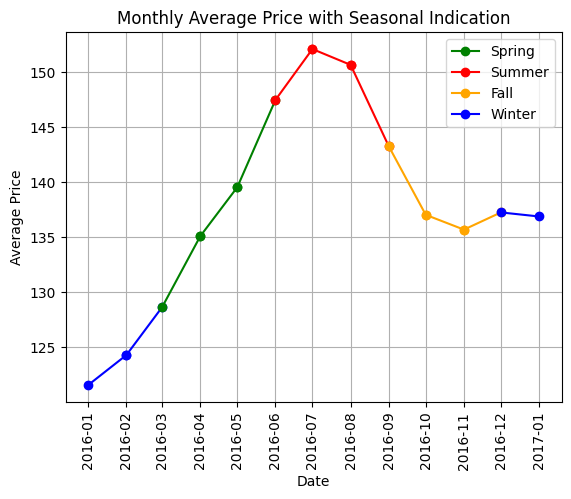

In [35]:
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

calendar['season'] = calendar['month'].apply(assign_season)

monthly_avg = calendar.groupby(['year', 'month'])['price'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))
monthly_avg['season'] = monthly_avg['month'].apply(assign_season)

colors = {
    'Spring': 'green',
    'Summer': 'red',
    'Fall': 'orange',
    'Winter': 'blue'
}

for i in range(len(monthly_avg) - 1):
    start_point = monthly_avg.iloc[i]
    end_point = monthly_avg.iloc[i + 1]
    
    plt.plot([start_point['date'], end_point['date']],
             [start_point['price'], end_point['price']],
             color=colors[start_point['season']],
             marker='o')

for season, color in colors.items():
    plt.plot([], [], color=color, label=season, marker='o')

plt.title('Monthly Average Price with Seasonal Indication')
plt.xticks(monthly_avg['date'], [date.strftime('%Y-%m') for date in monthly_avg['date']], rotation=90)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

We can see a clear peak during mid-summer and winter seems to be when prices are at their lowest. There is a significant difference between average prices in January 2016 versus January 2017, this can be explained by the overall rise in popularity of Airbnb in 2016. 


![seattle Temperature 2016](./temp_seattle.png)


*The daily average high (red line) and low (blue line) temperature, with 25th to 75th and 10th to 90th percentile bands. The thin dotted lines are the corresponding average perceived temperatures.*

This graph shows the temperature of Seattle in 2016. As we can see in January and December the temperatures are below freezing and it corresponds to the lowest average months. July- August is when Seattle is warmest and it correlates with the peak of prices. The temperature is within 20-27 which is quite comfortable and invites tourists. 

### Conclusion/ Inferences

Airbnb is website that enables people to rent out their properties for short or extended durations. It is popularly used as an alternative for hotels. Tracking the price of airbnb listings enables us to see travel trends. This dataset contains extensive data on various listings along with its price through the year of 2016. Due to its nature it enables us to view the problem in two perspectives, namely seasonal variations and weekly variations in price. 

We see that the price of listings is usually higher in weekends that weekdays. Here weekends refers to Friday and Saturday as Sunday's average price more closely follows weekday averages with an excpetion for long weekends. 

The data conists of price of listings in Seattle. Seattle experiences particularly harsh winters thus the price of listings falls during this period. Summer and Spring the weather is Seattle is quite pleasant thus we see a rise in tourists and a correlated rise in the average price of listings. Summer usually experiences a boom in travel as schools are on vacation during this period, allowing families with young children to take advantage of the time off for vacations. 

The factors of season and day of the week seem to accurately describe the variations in average price of listings. Thus a good meteorologist who can predict the temperature of Seattle may also be able to approximate the price of airbnbs. 

*Possible area of error- Initially we remove all rows where the value of price is NaN. If on a particular day most listings were unavailable the number of listings through which the average was found will be less this could skew the data.*